In [6]:
!pip install biopython

Number of sequences: 2
First sequence length: 3562868


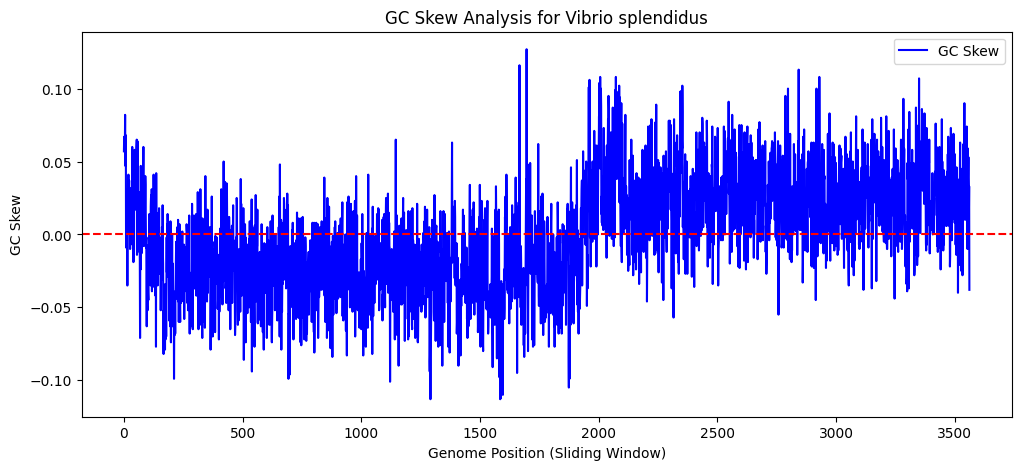


🔹 Frequent k-mers (OriC Candidates): {'TGACGGCGAC', 'TCCCAACGTC', 'TGATGTTCAA', 'TGACACTTGA', 'GCGGCGGATG', 'TGACTATCAA', 'GCATCGCCAG', 'GAGCTTGGCT', 'GTTACGTAGA', 'TGACCATTGG', 'CTAAATAGAA', 'ACCTTGGTAT', 'GCAGGTTCGA', 'GTCATCATGA', 'ATGGCGATAT', 'TAGAGCTTAG', 'GTAATCGGTA', 'ACGGTTCGAC', 'TTGGGCTATC', 'TAATGACTCT', 'TAACCGGGAT', 'GTGAAGAGGG', 'TAATACCAGA', 'TTTTTACTTA', 'CGTCAATCCT', 'CAACAAAACA', 'GTTCGAATCC', 'GTTCAATGTT', 'AGTGGACGTG', 'ACTAAACCAT', 'ACGTTACTTA', 'GAATACCTCG', 'GCTCAGCTGG', 'TGAACGTTTA', 'GCACTGACAC', 'GGGTCGCAGG', 'GTCTCTCCGA', 'GCTTTGCTGC', 'TGACTGCTGT', 'TTATGAGCTT', 'CGGTCGGAGG', 'AACTATAAAG', 'GCTCACAGCT', 'GACCGCGTTG', 'CCCTGAAGAT', 'AATCTGAATC', 'TTGCCTTAAC', 'TCTTTTAAGA', 'GGAATTGGTA', 'ACATCAATTT', 'GTTCGAACCG', 'TAGCTCAGCT', 'GTTGAACGTT', 'TGTTGGGCTA', 'GGTAATACAT', 'TGCGCTTTGA', 'TAAGAGAACA', 'CCGATGACCT', 'ATCTGCCATC', 'GCCGGCACTG', 'CGAAGCGAGC', 'CTGCGGTCGT', 'AACGTTACAT', 'TACTACTTAC', 'TGCCATCTGC', 'AGGTTCTGGA', 'GAAAACATCA', 'GCTCCAGCAG', 'ATGCCAGC

In [ ]:
# Import necessary libraries
from Bio import SeqIO  # For reading FASTA files
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
# Load the FASTA file containing the genome sequence
fasta_file = "GCA_022812045.1_ASM2281204v1_genomic.fna"
# Parse the FASTA file and store all sequences in a list
records = list(SeqIO.parse(fasta_file, "fasta"))
# Print the number of sequences found in the FASTA file
print(f"Number of sequences: {len(records)}")
# Extract the sequence from the first record (assuming the genome is in one sequence)
sequence = str(records[0].seq)
print(f"First sequence length: {len(sequence)}")
### 1️⃣ GC Skew Analysis ###
# The GC skew helps identify the origin (oriC) and terminus (ter) of replication.
# Define the sliding window size
window_size = 1000  # Each window will analyze 1000 nucleotides
# Compute GC skew for each window:
# GC Skew formula: (G - C) / (G + C)
# This indicates regions with more Guanine (G) or Cytosine (C).
gc_skew = [
    (sequence[i:i+window_size].count('G') - sequence[i:i+window_size].count('C')) 
    / window_size  # Normalize by window size
    for i in range(0, len(sequence) - window_size, window_size)  # Slide through the genome
]
# Plot the GC Skew graph
plt.figure(figsize=(12, 5))  # Set figure size
plt.plot(gc_skew, label="GC Skew", color='blue')  # Plot the GC skew values
plt.axhline(y=0, color='r', linestyle='--')  # Add a reference line at y=0
plt.xlabel("Genome Position (Sliding Window)")  # Label x-axis
plt.ylabel("GC Skew")  # Label y-axis
plt.title("GC Skew Analysis for Vibrio splendidus")  # Add title
plt.legend()  # Show legend
plt.show()  # Display the plot


from collections import defaultdict
def find_frequent_kmers(sequence, k, L, t):
    """
    Identifies k-mers that appear at least t times within any window of length L in the genome.
    Uses a sliding window approach for efficiency.
    Parameters:
    sequence (str): The DNA sequence.
    k (int): Length of the k-mer.
    L (int): Window size to search for k-mer clumps.
    t (int): Minimum occurrences of a k-mer to be considered significant.
    Returns:
    set: A set of k-mers that appear at least t times in any window of length L.
    """
    clump_kmers = set()  # Store k-mers that meet the frequency threshold
    kmer_counts = defaultdict(int)  # Dictionary to track k-mer occurrences in the current window
    # Step 1: Initialize first window (first L-length substring)
    for i in range(L - k + 1):
        kmer = sequence[i:i + k]
        kmer_counts[kmer] += 1
    # Add k-mers that appear at least t times in the first window
    for kmer, count in kmer_counts.items():
        if count >= t:
            clump_kmers.add(kmer)
    # Step 2: Slide the window across the genome
    for i in range(1, len(sequence) - L + 1):
        # Remove the outgoing k-mer (from the left of the window)
        outgoing_kmer = sequence[i - 1:i - 1 + k]
        kmer_counts[outgoing_kmer] -= 1
        if kmer_counts[outgoing_kmer] == 0:
            del kmer_counts[outgoing_kmer]  # Remove it completely to save space
        # Add the incoming k-mer (new k-mer entering from the right)
        incoming_kmer = sequence[i + L - k:i + L]
        kmer_counts[incoming_kmer] += 1
        # If the new k-mer reaches threshold t, add it to the result
        if kmer_counts[incoming_kmer] >= t:
            clump_kmers.add(incoming_kmer)
    return clump_kmers
# Example Parameters
k = 10   # Length of k-mer
L = 1900  # Window size
t = 3    # Minimum occurrences for a k-mer to be considered significant
# Run algorithm on the given sequence
frequent_kmers = find_frequent_kmers(sequence, k, L, t)
# Display results
print(f"\n🔹 Frequent k-mers (OriC Candidates): {frequent_kmers}")



In [10]:
with open("insulin_isoforms.fasta", "r") as file:
    print(file.read())


>QMS45326.1
MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN
>QMS45324.1
MGSETIKPAGAQQPSALQDRLHQKRPSSRSVPRAFASDHCPSAMALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN
>QMS45323.1
MGSETIKPAGAQQPSALQDRLHQKRPSSRSLSFCHGPVDAPPAPAGAAGPLGTXXXXXXX




In [11]:
from collections import defaultdict
import numpy as np

# Given insulin sequences
sequences = {
    "QMS45326.1": "MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQGSLQPLAL",
    "QMS45324.1": "MGSETIKPAGAQQPSALQDRLHQKRPSSRSVPRAFASDHCPSAMALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYVCGERGFFYTPKTREAEDLQVGQVELGGGPGAGSLQP",
    "QMS45323.1": "MGSETIKPAGAQQPSALQDRLHQKRPSSRSLSFCHGPVDAPPAPAGAAGPLGT"
}

# Define the 5-mer (Change if needed)
selected_5mer = "GERGF"

# Step 1: Find occurrences of the 5-mer in sequences
occurrences = defaultdict(list)
for seq_id, seq in sequences.items():
    for i in range(len(seq) - len(selected_5mer) + 1):
        if seq[i:i+len(selected_5mer)] == selected_5mer:
            occurrences[seq_id].append(i)

# Step 2: Construct PWM
pwm_matrix = np.zeros((len(selected_5mer), 20))  # 20 amino acids
amino_acids = "ACDEFGHIKLMNPQRSTVWY"  # Standard 20 amino acids

# Frequency count
position_counts = [defaultdict(int) for _ in range(len(selected_5mer))]
total_occurrences = 0
for seq_id, indices in occurrences.items():
    for pos in indices:
        total_occurrences += 1
        for i, aa in enumerate(selected_5mer):
            position_counts[i][aa] += 1

# Convert to probabilities
for i in range(len(selected_5mer)):
    for j, aa in enumerate(amino_acids):
        pwm_matrix[i, j] = position_counts[i].get(aa, 0) / (total_occurrences if total_occurrences > 0 else 1)

# Step 3: Construct Z(ij) Matrix
z_matrix = {seq_id: [0] * len(seq) for seq_id, seq in sequences.items()}
for seq_id, indices in occurrences.items():
    for pos in indices:
        z_matrix[seq_id][pos] = 1  # Marking occurrence

# Display results
print("\nPWM Matrix:")
print(pwm_matrix)
print("\nZ(ij) Matrix (1 indicates the 5-mer is found at that position):")
for seq_id, z_values in z_matrix.items():
    print(seq_id, z_values)




PWM Matrix:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Z(ij) Matrix (1 indicates the 5-mer is found at that position):
QMS45326.1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
QMS45324.1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
QMS45323.1 [